<a href="https://colab.research.google.com/github/Uzma-Jawed/AIandDataSci-class_work-and-practice/blob/main/32_ML_Ppeline_in_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📌 Building a Machine Learning Pipeline in scikit-learn

A pipeline allows us to chain together multiple steps in one workflow — preprocessing, feature transformations, and model training.
This ensures the same preprocessing is applied both during training and prediction.

### **1. Import Libraries**

In [32]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib

### **Explanation:**

* `pandas / numpy` → for data handling.

* `ColumnTransformer` → apply different preprocessing to numeric vs categorical columns.

* `StandardScaler` → scale numeric values to the same range.

* `OneHotEncoder` → turn categorical values (like city names) into numbers.

* `LinearRegression` → machine learning model.

* `Pipeline` → chain preprocessing + model.

* `train_test_split` → split data into training & testing sets.

* `joblib` → save & load the trained pipeline.

### **2. Create a Toy Dataset**

In [33]:
# --- toy real-estate dataset ---
df = pd.DataFrame({
    "rooms": [2, 3, 4, 3, 5, 2, 4, 3],
    "area_sqft": [900, 1200, 1600, 1100, 2100, 800, 1500, 1300],
    "city": ["A", "B", "A", "C", "B", "C", "A", "B"],
    "price": [120, 170, 230, 160, 320, 110, 240, 190]
})

* **Features (inputs):** `rooms, area_sqft, city`

* **Target (output):** `price`

### **3. Split Data into Features & Target**

In [34]:
X = df.drop(columns="price")   # Features
y = df["price"]                # Target

* `X` = input columns used to predict

* `y` = output column to predict

### **4. Define Preprocessing**

In [35]:
numeric_features = ["rooms", "area_sqft"]
categorical_features = ["city"]

# Pipeline for numeric columns → scaling
numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pipeline for categorical columns → One-Hot-Encoding
categorical_tf = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

### 🔹 Why this step?

* Numeric values like `area_sqft` can be very large compared to `rooms`. Scaling puts them on the same scale.

* Categorical values like `city = A, B, C` cannot be used directly → OneHotEncoder converts them to numeric format.

### **5. Combine Preprocessing with ColumnTransformer**

In [36]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, numeric_features),
        ("cat", categorical_tf, categorical_features),
    ]
)

### This tells sklearn:

* Apply **numeric pipeline** on numeric columns.

* Apply **categorical pipeline** on categorical columns.

### **6. Train-Test Split**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

* **Train set** → used to fit the model.

* **Test set** → used to evaluate performance.

* `test_size=0.25` → 25% of data used for testing.

* `random_state=42` → reproducibility.

### **7. Build the Full Pipeline**

In [38]:
model = Pipeline(steps=[
    ("preprocess", preprocess),        # Step 1: Preprocessing
    ("regressor", LinearRegression())  # Step 2: Linear Regression model
])

* The pipeline first applies **preprocessing**.

* Then feeds transformed data into LinearRegression.




### **8. Train the Model**

In [39]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['rooms', 'area_sqft']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city'])])),
                ('regressor', LinearRegression())])

* The pipeline runs preprocessing → trains regression on transformed features.

### **9. Make Predictions & Evaluate**

In [40]:
# Predictions on test data
preds = model.predict(X_test)
print("Predictions:", np.round(preds, 2))
print("Actual:", y_test.values)

# Quick evaluation using R^2 score
print("R^2 Score:", model.score(X_test, y_test))

Predictions: [192.5 100. ]
Actual: [170 110]
R^2 Score: 0.663194444444445




*  **Predictions** = pipeline automatically preprocesses `X_test` before predicting.

* **R² score** = measures how well the model explains variance in the target (closer to 1 is better).




### **10. Save & Load Model**

In [41]:
# Save trained pipeline
joblib.dump(model, "linear_regression_pipeline.pkl")

# Load it later
# loaded_model = joblib.load("linear_regression_pipeline.pkl")
# preds = loaded_model.predict(X_test)

['linear_regression_pipeline.pkl']

### **Why save?**

* You don’t need to re-train again.

* Can directly load and use for predictions.

If you want to use **Random Forest** instead of Linear Regression, you just replace this step:

```
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", LinearRegression())
])
```
To This:


```
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),                # preprocessing stays same
    ("regressor", RandomForestRegressor(
        n_estimators=100, random_state=42))    # Random Forest
])
```
### 🔹 Training and Prediction (same as before)



```
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Predictions:", rf_preds)
print("R^2:", rf_model.score(X_test, y_test))

```
### 🔹 Error Metrics


```
mae = mean_absolute_error(y_test, rf_preds)
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))

```
✅ That’s it! The **preprocessing part does not change**, only the final model changes.
This makes pipelines super flexible:

You can switch to `Ridge`, `Lasso`, `ElasticNet`, `DecisionTree`, `RandomForest`, etc. just by replacing one line.

### **11. Visualize Predictions vs Actual**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


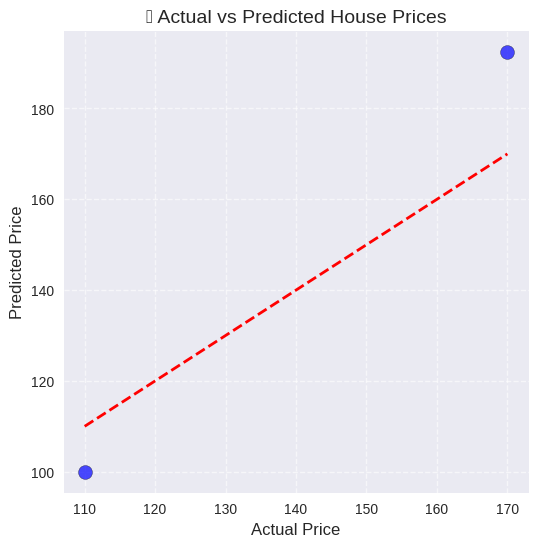

In [42]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, preds, color="blue", edgecolor="k", s=100, alpha=0.7)

# Line of perfect predictions
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("📊 Actual vs Predicted House Prices", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### **🔎 What this shows:**

* **Blue dots** → predictions vs actual values.

* **Red dashed line** → perfect predictions (if model was 100% accurate, all dots would lie on this line).

* The closer the points are to the line → the better the model.

### **Extra: Model Error (RMSE & MAE)**

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, preds)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

Mean Absolute Error (MAE): 16.25
Root Mean Squared Error (RMSE): 17.41


* **MAE** = average absolute difference between actual & predicted values.

* **RMSE** = like MAE but penalizes large errors more.

### **🔹 Part 1: 📊 Linear Regression (completed)**

* Data preprocessing ✅

* Train/test split ✅

* Linear Regression model ✅

* Evaluation (R², MAE, RMSE) ✅

* Visualization ✅

* Save/load model ✅

### **🔹 Part 2: 🌲 Random Forest Regression (practice)**

Now, try a more powerful model, **Random Forest**


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest pipeline
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),                  # same preprocessing
    ("regressor", RandomForestRegressor(
        n_estimators=100, random_state=42))      # RF with 100 trees
])

# Train the RF model
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
print("Predictions:", np.round(rf_preds, 2))
print("R^2:", rf_model.score(X_test, y_test))

Predictions: [173.7 145.8]
R^2: 0.2803722222222219


### **🔹 Evaluate Random Forest**

In [45]:
# Error metrics
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

print("Random Forest MAE:", round(rf_mae, 2))
print("Random Forest RMSE:", round(rf_rmse, 2))

Random Forest MAE: 19.75
Random Forest RMSE: 25.45


### **🔹 Visualize Random Forest Predictions**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


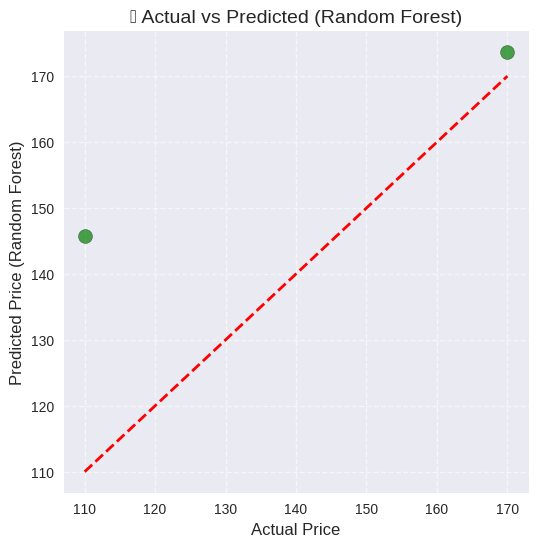

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_preds, color="green", edgecolor="k", s=100, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price (Random Forest)", fontsize=12)
plt.title("🌲 Actual vs Predicted (Random Forest)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### **Compare**

* Linear Regression (simple baseline model)

* Random Forest (advanced, non-linear model)

In [47]:
print("Linear Regression R²:", model.score(X_test, y_test))
print("Random Forest R²:", rf_model.score(X_test, y_test))

Linear Regression R²: 0.663194444444445
Random Forest R²: 0.2803722222222219


### **Comparison Table**

In [48]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R² Score": [
        model.score(X_test, y_test),
        rf_model.score(X_test, y_test)
    ],
    "MAE": [mae, rf_mae],
    "RMSE": [rmse, rf_rmse]
})

print(results)

               Model  R² Score    MAE       RMSE
0  Linear Regression  0.663194  16.25  17.410485
1      Random Forest  0.280372  19.75  25.449263


## 📌 Why Random Forest is Useful After Linear Regression

### 🔹 Linear Regression Recap

* Linear Regression is the **simplest regression model**.
* It assumes a **straight-line (linear) relationship** between features (like rooms, area, city) and the target (price).
* In our toy dataset, it worked fairly well → **R² ≈ 0.66**.
* Advantage: very **interpretable** (we can see coefficients).

---

### 🔹 Introducing Random Forest

* Random Forest is an **ensemble model** made up of many decision trees 🌲.
* Each tree learns a different pattern in the data, and the forest averages their results.
* Advantage: captures **non-linear relationships** and **feature interactions** that Linear Regression can’t.
* Example: If price depends on rooms *and* city in a complicated way, Random Forest can detect it.

---

### 🔹 Why Did Random Forest Perform Worse Here?

* Our dataset is **very small (only 8 rows, 2 for testing)**.
* Random Forest usually shines with **larger datasets** and **complex patterns**.
* With such little data, Linear Regression’s simplicity actually fits better.
* Random Forest may have **overfit** on the small training data, which reduces test performance.

---

### 🔹 When to Prefer Random Forest

* When the dataset is **larger (hundreds/thousands of rows)**.
* When relationships are **non-linear** (e.g., price doesn’t increase evenly with area).
* When you care more about **accuracy** than interpretability.

---

### ✅ Key Takeaway

* Always start with a **simple baseline (Linear Regression)**.
* Then try more powerful models like **Random Forest, Gradient Boosting, etc.**
* Compare results → whichever gives better test performance is your choice.
* Pipelines make it easy to **swap models** and experiment without redoing preprocessing.

---